In [1]:
import pandas as pd 
import os
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from subprocess import check_output
import numpy as np
import matplotlib.pyplot as plt
import warnings
import math
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima.model import ARIMAResults
from pandas import datetime
from sklearn.metrics import mean_squared_error
df = pd.read_csv("../Resources/btcjoin.csv", parse_dates=['date'])
df = df.drop(columns=['volume','change', 'low', 'high', 'open'])
df = df.rename(columns={"value": "wallets"})
print(df.head())
#https://www.kaggle.com/code/thebrownviking20/everything-you-can-do-with-a-time-series

C:\Users\16474\AppData\Local\Temp\ipykernel_9316\1374750506.py:14: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


        date price  wallets  address      mined
0 2010-09-25   0.1        2    656.0  4109450.0
1 2010-09-26   0.1        2    444.0  4110750.0
2 2010-09-27   0.1        2   1070.0  4132150.0
3 2010-09-28   0.1        2   1503.0  4133200.0
4 2010-09-29   0.1        2   1049.0  4148050.0


In [2]:
df.dtypes

date       datetime64[ns]
price              object
wallets             int64
address           float64
mined             float64
dtype: object

In [3]:
df['price']=df['price'].str.replace(',','')
df['price']=df['price'].astype("float")

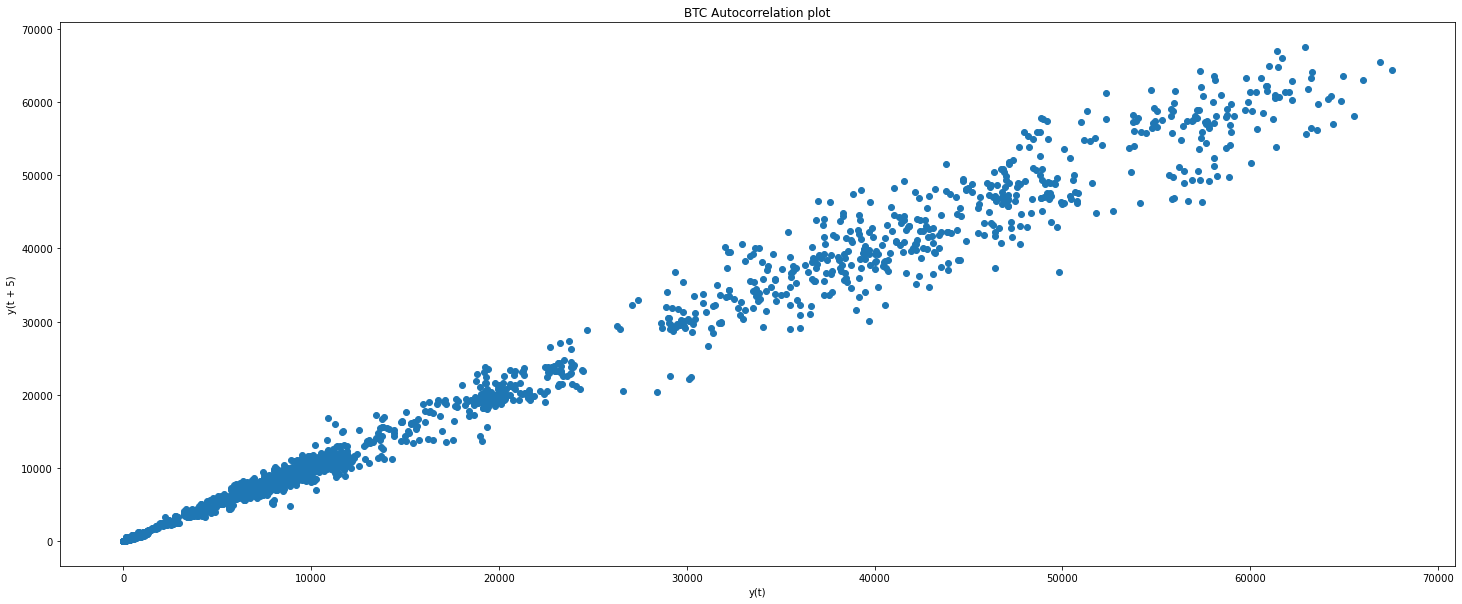

In [4]:
from pandas.plotting import lag_plot
plt.figure(figsize=(25,10))
lag_plot(df['price'], lag=5)
plt.title('BTC Autocorrelation plot')
plt.savefig("../Website/images/autocorrelationprices.png", dpi = 72)

<AxesSubplot:>

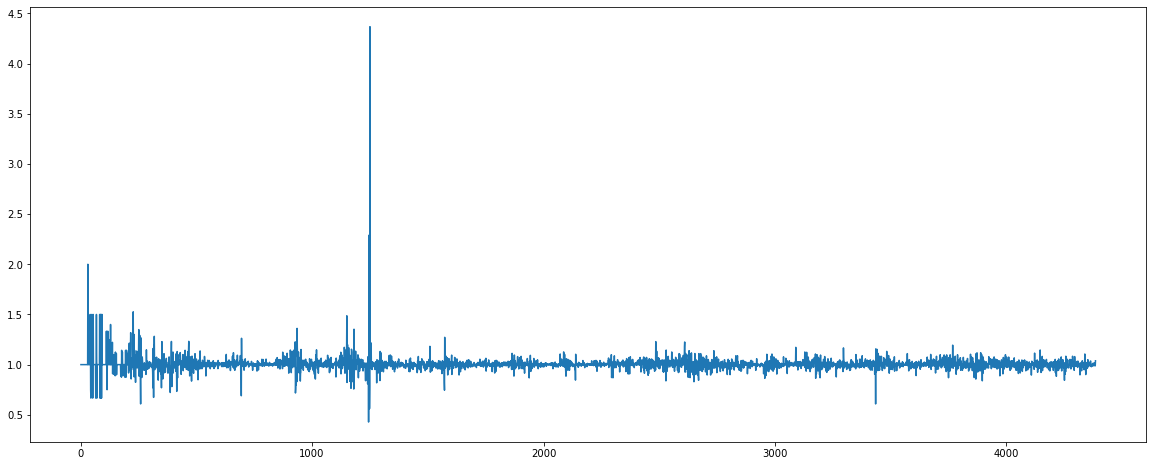

In [5]:
df['Change'] = df.price.div(df.price.shift())
df['Change'].plot(figsize=(20,8))

<AxesSubplot:>

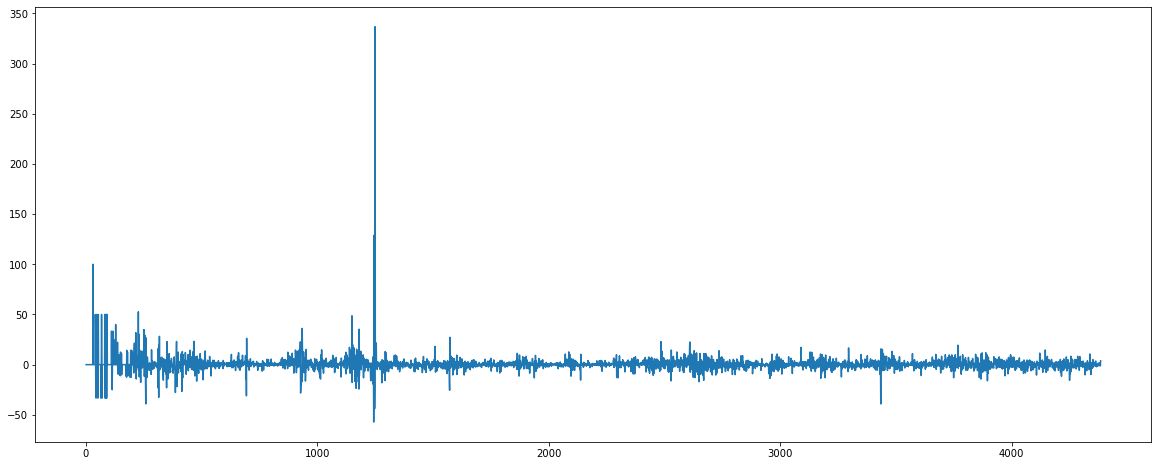

In [6]:
df['Return'] = df.Change.sub(1).mul(100)
df['Return'].plot(figsize=(20,8))

<AxesSubplot:>

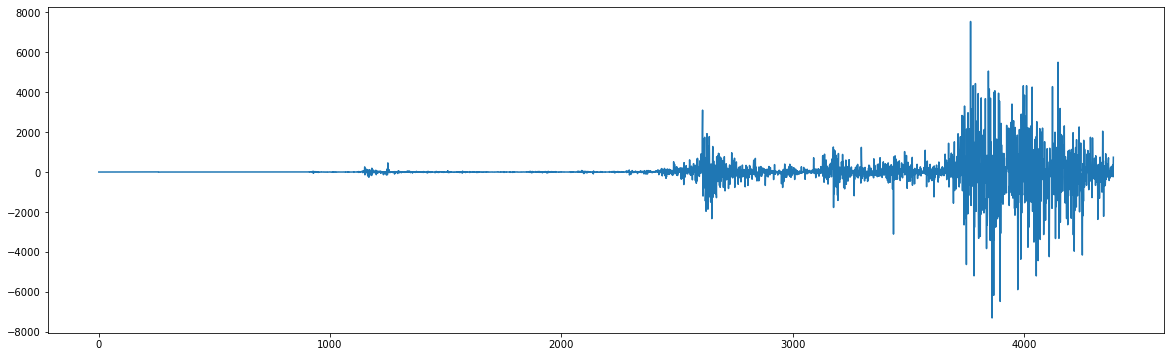

In [7]:
df.price.diff().plot(figsize=(20,6))

In [8]:
import plotly.express as px

df['90dmean'] = df['price'].rolling(90).mean()
df['200dmean'] = df['price'].rolling(200).mean()

fig = px.line(x=df['date'], y=df['price'])
fig.add_scatter(x=df['date'], y=df['90dmean'], name="90dmean")
fig.add_scatter(x=df['date'], y=df['200dmean'], name="200dmean")
# fig.add_scatter(x=data.index, y=data['Open'], name="Open")

fig.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list([
            dict(count = 1, label = "1m", step = "month", stepmode = "backward"),
            dict(count = 6, label = "6m", step = "month", stepmode = "backward"),
            dict(count = 1, label = "YTD", step = "year", stepmode = "todate"),
            dict(count = 1, label = "1y", step = "year", stepmode = "backward"),
            dict(step = "all")
        ])
    )
)


fig.show()

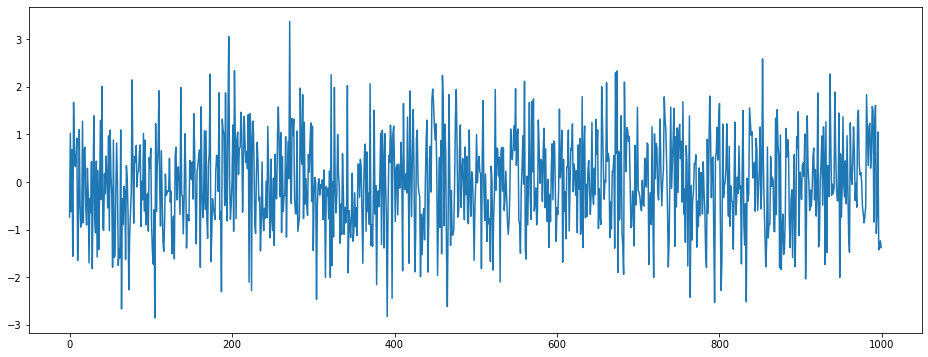

In [9]:
# Plotting white noise
from pylab import rcParams
rcParams['figure.figsize'] = 16, 6
white_noise = np.random.normal(loc=0, scale=1, size=1000)
# loc is mean, scale is variance
plt.plot(white_noise)

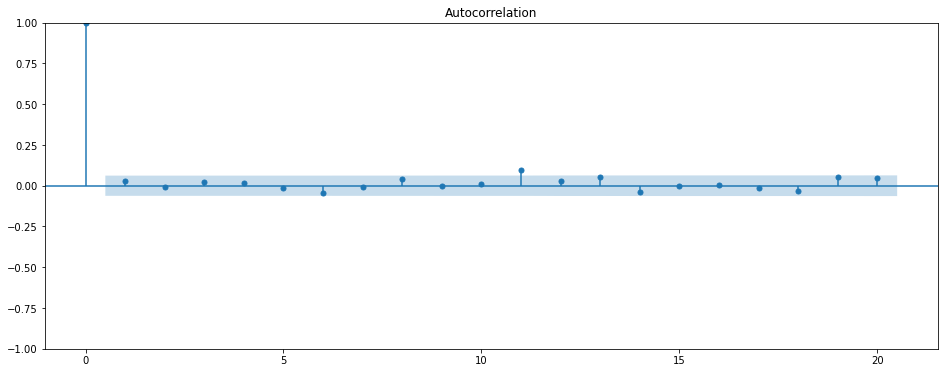

In [10]:
# Plotting autocorrelation of white noise
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(white_noise,lags=20)
plt.show()

c:\Users\16474\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



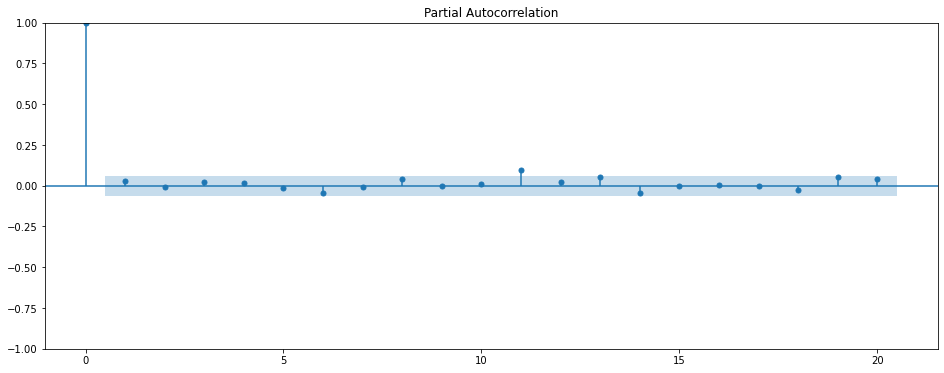

In [11]:
plot_pacf(white_noise,lags=20)
plt.show()

In [12]:
# Augmented Dickey-Fuller test on volume of google and microsoft stocks 
from statsmodels.tsa.stattools import adfuller
adf = adfuller(df["price"])
print("p-value of BTC: {}".format(float(adf[1])))
adf


p-value of BTC: 0.3958551417121587


(-1.7692030079691388,
 0.3958551417121587,
 31,
 4354,
 {'1%': -3.4318527927183196,
  '5%': -2.86220405019551,
  '10%': -2.5671234784459993},
 68836.1557888487)

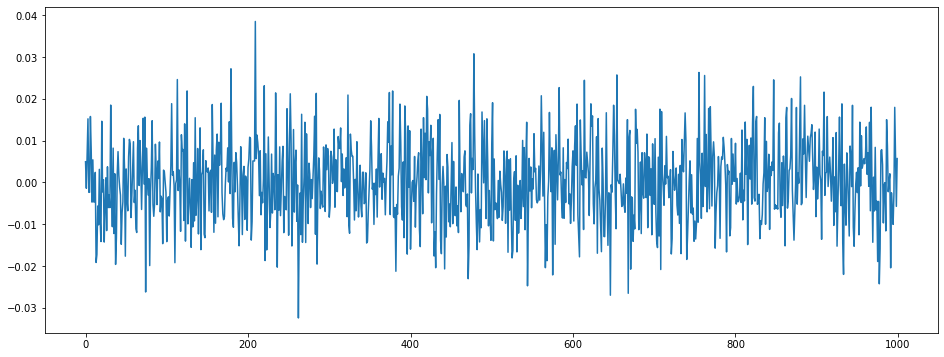

In [13]:
from numpy.random import normal, seed
seed(42)
rcParams['figure.figsize'] = 16, 6
random_walk = normal(loc=0, scale=0.01, size=1000)
plt.plot(random_walk)
plt.show()

In [14]:
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot
fig = ff.create_distplot([random_walk],['Random Walk'],bin_size=0.001)
iplot(fig, filename='Basic Distplot')